In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate

In [2]:
script_dir = os.path.dirname('/home/daniel/pymoogi-master/example/') # absolute dir the script is in
syn_spec_rel_path = "HE_syn/HE0241-3512_ch.out3" #.out3
spec_rel_path = "specs/HE0241-3512_ch.txt" #.txt
abs_syn_path = os.path.join(script_dir, syn_spec_rel_path)
abs_spec_path = os.path.join(script_dir, spec_rel_path)

spec = np.loadtxt(abs_spec_path)
spec_wave = spec[:,0]#+0.36
spec_flux = spec[:,1]

syn_specs_open = open(abs_syn_path)
syn_specs= syn_specs_open.read().splitlines()
syn_specs_wave = []
syn_specs_flux = []

for line in syn_specs:
    try:
        syn_specs_wave.append(float(line.split('     ')[0]))
        syn_specs_flux.append(float(line.split('     ')[1]))
    except ValueError:
        syn_specs_wave.append(' ')
        syn_specs_flux.append(' ')
        
syn_specs_wave = "".join(str(syn_specs_wave[2:])) 
syn_specs_wave = syn_specs_wave[1:-1].split(", ' ', ' ',")
syn_specs_flux = "".join(str(syn_specs_flux[2:]))
syn_specs_flux = syn_specs_flux[1:-1].split(", ' ', ' ',")

syn_1_wave = []
syn_2_wave = []
syn_3_wave = []
syn_4_wave = []
syn_1_flux = []
syn_2_flux = []
syn_3_flux = []
syn_4_flux = []

for i in range(len(syn_specs_wave[0].split(','))):
    syn_1_wave.append(float(syn_specs_wave[0].split(',')[i]))
    syn_1_flux.append(float(syn_specs_flux[0].split(',')[i]))
for j in range(len(syn_specs_wave[1].split(','))):
    syn_2_wave.append(float(syn_specs_wave[1].split(',')[j]))
    syn_2_flux.append(float(syn_specs_flux[1].split(',')[j]))
for k in range(len(syn_specs_wave[2].split(','))):
    syn_3_wave.append(float(syn_specs_wave[2].split(',')[k]))
    syn_3_flux.append(float(syn_specs_flux[2].split(',')[k]))
for l in range(len(syn_specs_wave[3].split(','))):
    syn_4_wave.append(float(syn_specs_wave[3].split(',')[l]))
    syn_4_flux.append(float(syn_specs_flux[3].split(',')[l]))
    
syn_1_wave = np.array(syn_1_wave)
syn_2_wave = np.array(syn_2_wave)
syn_3_wave = np.array(syn_3_wave)
syn_4_wave = np.array(syn_4_wave)
syn_1_flux = np.array(syn_1_flux)
syn_2_flux = np.array(syn_2_flux)
syn_3_flux = np.array(syn_3_flux)
syn_4_flux = np.array(syn_4_flux)

syn_1_flux = syn_1_flux[np.where((syn_1_wave >= (spec_wave[0]))&(syn_1_wave <= (spec_wave[-1])))]
syn_2_flux = syn_2_flux[np.where((syn_2_wave >= (spec_wave[0]))&(syn_2_wave <= (spec_wave[-1])))]
syn_3_flux = syn_3_flux[np.where((syn_3_wave >= (spec_wave[0]))&(syn_3_wave <= (spec_wave[-1])))]
syn_4_flux = syn_4_flux[np.where((syn_4_wave >= (spec_wave[0]))&(syn_4_wave <= (spec_wave[-1])))]
syn_1_wave = syn_1_wave[np.where((syn_1_wave >= (spec_wave[0]))&(syn_1_wave <= (spec_wave[-1])))]
syn_2_wave = syn_2_wave[np.where((syn_2_wave >= (spec_wave[0]))&(syn_2_wave <= (spec_wave[-1])))]
syn_3_wave = syn_3_wave[np.where((syn_3_wave >= (spec_wave[0]))&(syn_3_wave <= (spec_wave[-1])))]
syn_4_wave = syn_4_wave[np.where((syn_4_wave >= (spec_wave[0]))&(syn_4_wave <= (spec_wave[-1])))]
    
spec_interp = interpolate.interp1d(spec_wave, 
                                   spec_flux)
spec_new_wave = np.arange(spec_wave[0],spec_wave[-1],np.diff(syn_1_wave)[0:1][0])

syn_specs_open.close()

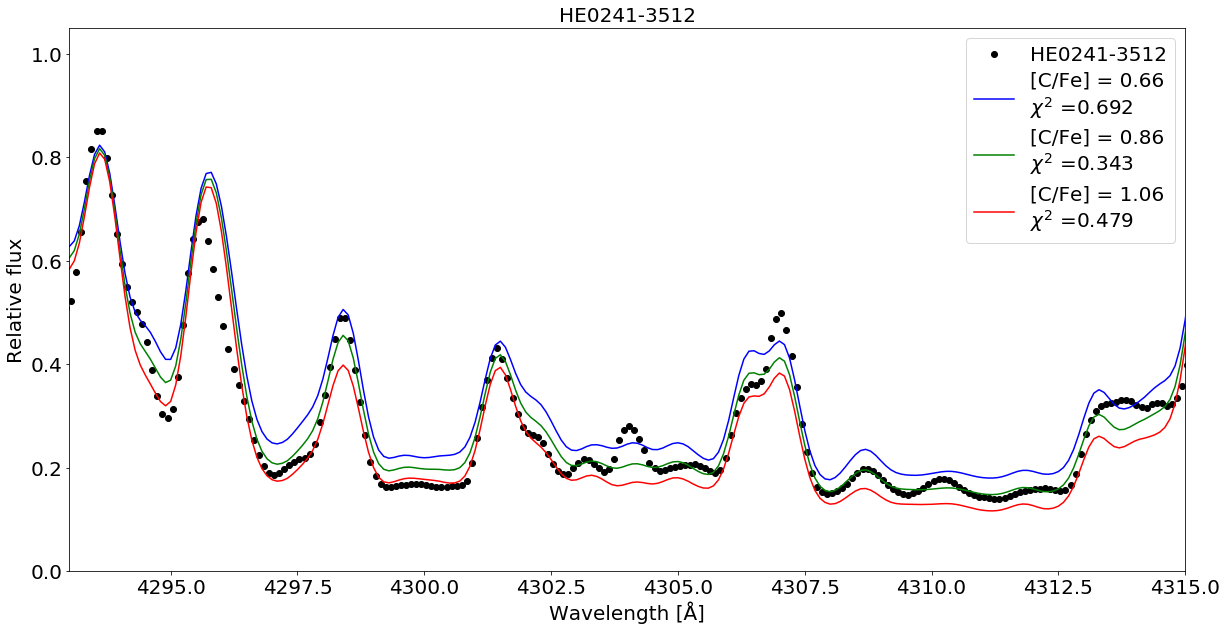

Chi_1 (blue)  : 0.692341254404
Chi_2 (orange): 0.342879353389
Chi_3 (green) : 0.342879353389
Chi_4 (red)   : 0.47896519269
std_1 (blue)  : 0.0375688730845
std_2 (orange): 0.0385658127227
std_3 (green) : 0.0385658127227
std_4 (red)   : 0.0405148860345


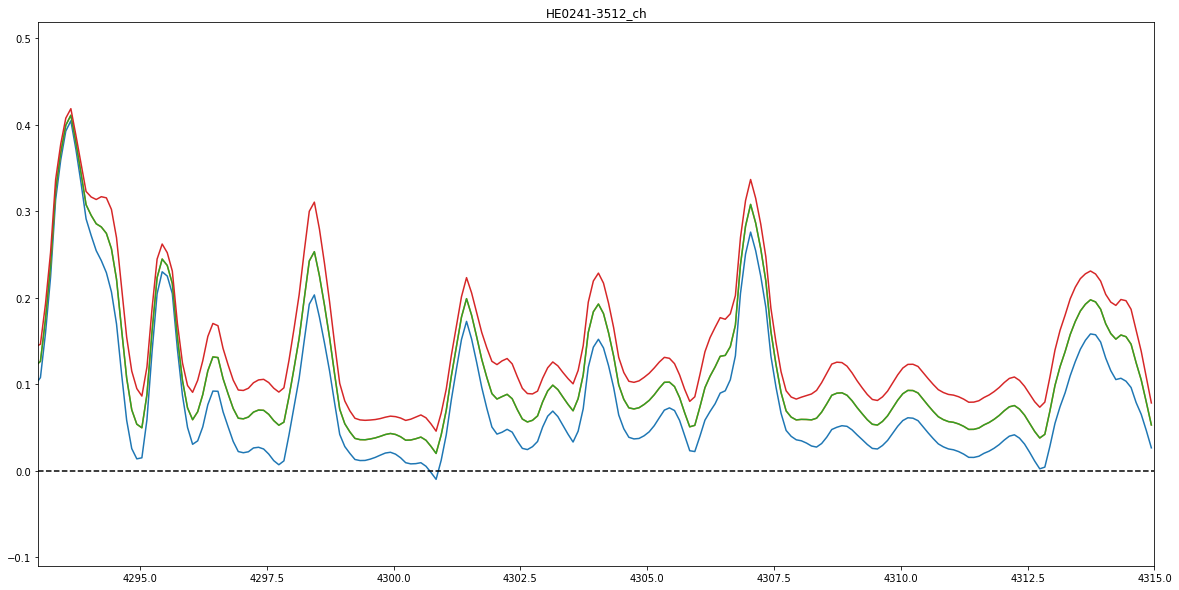

In [4]:
xmin = 4293
xmax = 4315
ymin = 0.0
ymax = 1.05
r = 0.7

std_1 = np.std(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_1_wave[np.where(syn_1_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                       (spec_new_wave <= syn_1_wave[np.where(syn_1_wave <= xmax)][-1]))])-
                syn_1_flux[np.where((syn_1_wave >= xmin) & (syn_1_wave <= xmax))]),ddof=1)

std_2 = np.std(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_2_wave[np.where(syn_2_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                       (spec_new_wave <= syn_2_wave[np.where(syn_2_wave <= xmax)][-1]))])-
                syn_2_flux[np.where((syn_2_wave >= xmin) & (syn_2_wave <= xmax))]),ddof=1)

std_3 = np.std(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_3_wave[np.where(syn_3_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                       (spec_new_wave <= syn_3_wave[np.where(syn_3_wave <= xmax)][-1]))])-
                syn_3_flux[np.where((syn_3_wave >= xmin) & (syn_3_wave <= xmax))]),ddof=1)

std_4 = np.std(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_4_wave[np.where(syn_4_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                       (spec_new_wave <= syn_4_wave[np.where(syn_4_wave <= xmax)][-1]))])-
                syn_4_flux[np.where((syn_4_wave >= xmin) & (syn_4_wave <= xmax))]),ddof=1)

Chi_1 = np.sum(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_1_wave[np.where(syn_1_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                         (spec_new_wave <= syn_1_wave[np.where(syn_1_wave <= xmax)][-1]))])-
                  syn_1_flux[np.where((syn_1_wave >= xmin) & (syn_1_wave <= xmax))])**2)

Chi_2 = np.sum(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_2_wave[np.where(syn_2_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                         (spec_new_wave <= syn_2_wave[np.where(syn_2_wave <= xmax)][-1]))])-
                  syn_2_flux[np.where((syn_2_wave >= xmin) & (syn_2_wave <= xmax))])**2)

Chi_3 = np.sum(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_3_wave[np.where(syn_3_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                         (spec_new_wave <= syn_3_wave[np.where(syn_3_wave <= xmax)][-1]))])-
                  syn_3_flux[np.where((syn_3_wave >= xmin) & (syn_3_wave <= xmax))])**2)

Chi_4 = np.sum(((r*spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_4_wave[np.where(syn_4_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                         (spec_new_wave <= syn_4_wave[np.where(syn_4_wave <= xmax)][-1]))])-
                  syn_4_flux[np.where((syn_4_wave >= xmin) & (syn_4_wave <= xmax))])**2)



plt.figure(figsize=(20,10))
plt.plot(spec_new_wave, r*spec_interp(spec_new_wave), 'o', label=''+syn_spec_rel_path[7:-8]+'', color='black')
plt.plot(syn_1_wave, syn_1_flux, label='[C/Fe] = 0.66' 
                                       '\n'
                                       r'$\chi^2$ =' ''+'%.3f' % Chi_1+'', color='blue')
plt.plot(syn_2_wave, syn_2_flux, label='orange', color='orange')
plt.plot(syn_3_wave, syn_3_flux, label='[C/Fe] = 0.86' 
                                       '\n'
                                       r'$\chi^2$ =' ''+'%.3f' % Chi_2+'', color='green')
plt.plot(syn_4_wave, syn_4_flux, label='[C/Fe] = 1.06' 
                                       '\n'
                                       r'$\chi^2$ =' ''+'%.3f' % Chi_4+'', color='red')
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('Wavelength [Å]', fontsize=20)
plt.ylabel('Relative flux', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(''+syn_spec_rel_path[7:-8]+'', fontsize=20)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
#plt.savefig('carbonfromch.png')
plt.show()

print('Chi_1 (blue)  :', Chi_1)
print('Chi_2 (orange):', Chi_2)
print('Chi_3 (green) :', Chi_3)
print('Chi_4 (red)   :', Chi_4)

print('std_1 (blue)  :', std_1)
print('std_2 (orange):', std_2)
print('std_3 (green) :', std_3)
print('std_4 (red)   :', std_4)

plt.figure(figsize=(20,10))
plt.plot(spec_new_wave[np.where((spec_new_wave >= syn_1_wave[np.where(syn_1_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                (spec_new_wave <= syn_1_wave[np.where(syn_1_wave <= xmax)][-1]))], 
         spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_1_wave[np.where(syn_1_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_1_wave[np.where(syn_1_wave <= xmax)][-1]))] - 
         syn_1_flux[np.where((syn_1_wave >= xmin) & (syn_1_wave <= xmax))])

plt.plot(spec_new_wave[np.where((spec_new_wave >= syn_2_wave[np.where(syn_2_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                (spec_new_wave <= syn_2_wave[np.where(syn_2_wave <= xmax)][-1]))], 
         spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_2_wave[np.where(syn_2_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_2_wave[np.where(syn_2_wave <= xmax)][-1]))] - 
         syn_2_flux[np.where((syn_2_wave >= xmin) & (syn_2_wave <= xmax))])

plt.plot(spec_new_wave[np.where((spec_new_wave >= syn_3_wave[np.where(syn_3_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                (spec_new_wave <= syn_3_wave[np.where(syn_3_wave <= xmax)][-1]))], 
         spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_3_wave[np.where(syn_3_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_3_wave[np.where(syn_3_wave <= xmax)][-1]))] - 
         syn_3_flux[np.where((syn_3_wave >= xmin) & (syn_3_wave <= xmax))])

plt.plot(spec_new_wave[np.where((spec_new_wave >= syn_4_wave[np.where(syn_4_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                (spec_new_wave <= syn_4_wave[np.where(syn_4_wave <= xmax)][-1]))], 
         spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_4_wave[np.where(syn_4_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_4_wave[np.where(syn_4_wave <= xmax)][-1]))] - 
         syn_4_flux[np.where((syn_4_wave >= xmin) & (syn_4_wave <= xmax))])

plt.axhline(y=0.0, color='black', linestyle='--')
plt.title(''+syn_spec_rel_path[7:-5]+'')
plt.xlim(xmin,xmax)
plt.ylim(min(spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_1_wave[np.where(syn_1_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_1_wave[np.where(syn_1_wave <= xmax)][-1]))] - 
         syn_1_flux[np.where((syn_1_wave >= xmin) & (syn_1_wave <= xmax))])-0.1,
        max(spec_interp(spec_new_wave)[np.where((spec_new_wave >= syn_4_wave[np.where(syn_4_wave >= xmin)][0]-np.diff(syn_1_wave)[0:1][0]) & 
                                                            (spec_new_wave <= syn_4_wave[np.where(syn_4_wave <= xmax)][-1]))] - 
         syn_4_flux[np.where((syn_4_wave >= xmin) & (syn_4_wave <= xmax))])+0.1)
plt.savefig('carbonfromch.png')
plt.show()